# Tarea 3 Cosmología

Benjamín Guerra Cuadra

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import camb


In [2]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

# P6

In [3]:
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

results = camb.get_results(pars)

In [4]:

pars.set_matter_power(redshifts=[0], kmax=1)
results = camb.get_results(pars)

transf = results.get_matter_transfer_data()

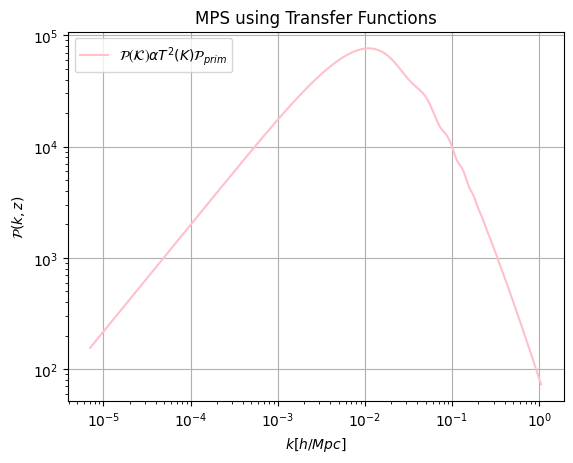

In [20]:
# Get transfer function
kh = transf.transfer_data[0, :, 0]
k = kh * results.Params.h  # transfer data gives the results in units of h/MPC, so we transform

transfer = transf.transfer_data[camb.model.Transfer_tot-1,:,0]

# Get primordial power spectrum
primordial_PK = results.Params.scalar_power(k)

# All together
matter_power = primordial_PK * transfer**2 * k**4 / (k**3/(2*np.pi**2))



plt.loglog(k,matter_power, label=r'$\mathcal{P(K)}\alpha T^2(K)\mathcal{P}_{prim}$', c='pink')
plt.grid()

plt.ylabel(r'$\mathcal{P}(k,z)$')
plt.xlabel(r'$k [h/Mpc]$')
plt.legend()
plt.title('MPS using Transfer Functions')
plt.show()

# P9